<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/JehnsenShannonDivergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1st ex

In [83]:
import random
random.seed(0)

G1 = [random.gauss(0.0, 1.05) for _ in range(1000)]
G2 = [random.gauss(0.8, 1.45) for _ in range(1000)]

#alternatively
#import numpy as np
#random_numbers = np.random.normal(1.0, 0.005, 10)

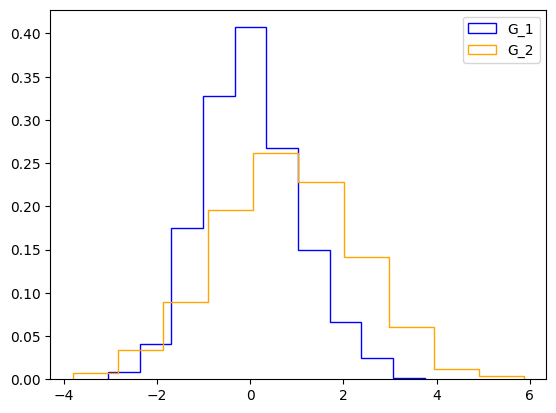

In [84]:
import matplotlib.pyplot as plt
plt.hist(G1, density = True,  histtype='step', align='mid', color = 'blue', label = 'G_1')
plt.hist(G2, density = True,  histtype='step', align='mid', color = 'orange', label = 'G_2')
plt.legend()

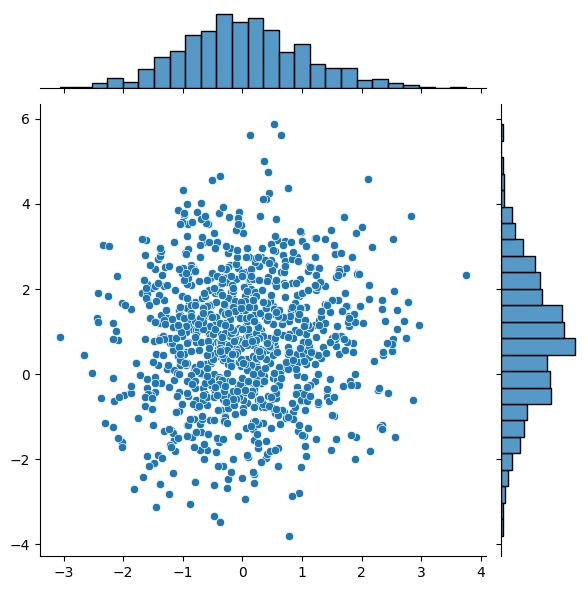

In [85]:
# take another look
import seaborn as sns
sns.jointplot(x=G1, y=G2)

In [4]:
# check bin edges
import numpy as np
_, bin_edges1 = np.histogram(G1)
_, bin_edges2 = np.histogram(G2)
print(bin_edges1)
print(bin_edges2)
# we need common binning:

[-3.05325646 -2.37291268 -1.6925689  -1.01222512 -0.33188133  0.34846245
  1.02880623  1.70915001  2.3894938   3.06983758  3.75018136]
[-4.10226374 -3.13446757 -2.16667139 -1.19887521 -0.23107904  0.73671714
  1.70451332  2.67230949  3.64010567  4.60790184  5.57569802]


[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
[0.001 0.023 0.132 0.356 0.319 0.134 0.034 0.001 0.    0.   ]
[0.00900901 0.04304304 0.0980981  0.21121121 0.27327327 0.2022022
 0.11711712 0.03603604 0.00700701 0.003003  ]


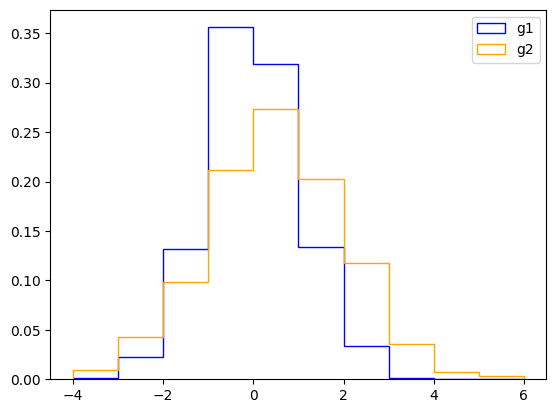

In [5]:
import math
fr = math.floor(min(min([G1,G2])))
to = math.ceil(max(max([G1,G2])))
bin_edges = np.linspace(fr,to,len(bin_edges1))  # common bin edges, note the lack of index
print(bin_edges)

plt.hist(G1, bins = bin_edges, density = True,  histtype='step', align='mid', color = 'blue', label = 'g1')
plt.hist(G2, bins = bin_edges, density = True,  histtype='step', align='mid', color = 'orange', label = 'g2')
plt.legend()

P, _ = np.histogram(G1, bins=bin_edges, density = True)  # "rename" G1 PDF -> P
Q, _ = np.histogram(G2, bins=bin_edges, density = True)  # "rename" G2 PDF -> Q
print(P)
print(Q)

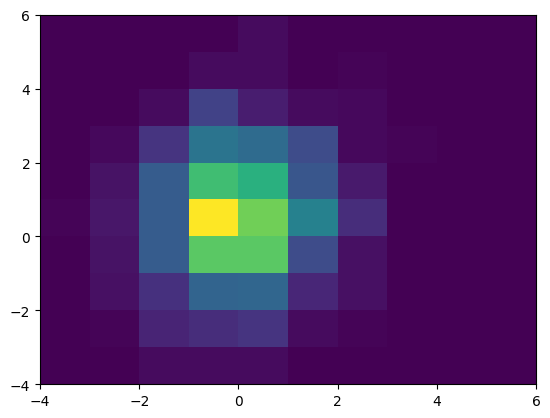

In [6]:
# take a different look
plt.hist2d(G1, G2, bins=bin_edges, density=True)
plt.show()

In [7]:
#import numpy as np
eps = np.finfo(float).eps

def KLD(P,Q):
    """
    D(X||Y) is the Kullback Leibler Divergence:
        D(X||Y) = SUM[ P* log (P/Q) ]
    """
    quotient = P/Q
    for i in range(len(quotient)):
        if quotient[i]== 0:
            quotient[i] = eps  # <-- this is the trick ;)
    return sum(P* np.log10(quotient))

KLD(P,Q)

In [22]:
def JSD(P,Q):
    """
    JSD(P||Q) = 0.5* D(P||M) + 0.5* D(Q||M), where
    M = 0.5* (P+Q) and
    D(X||Y) is the Kullback Leibler Divergence:
        D(X||Y) = SUM[ P* log (P/Q) ]
    """
    M = 0.5* (P+Q)
    return 0.5* KLD(P,M) + 0.5* KLD(Q,M)

JSD(P,Q)

0.01930235987015596

2nd ex

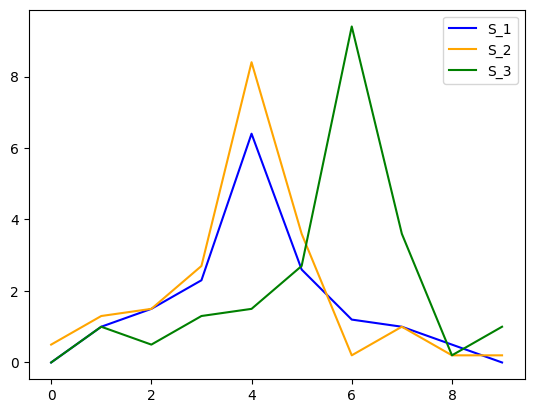

In [50]:
# hogus bogus spectrums #1
S1 = [round(random.uniform(0, 10.0), 2) for _ in range(10)]
S2 = [round(random.uniform(0, 10.0), 2) for _ in range(10)]
S3 = [round(random.uniform(0, 10.0), 2) for _ in range(10)]

# hogus bogus spectrums #2
S1 = [0.0, 1.0, 1.5, 2.3, 6.4, 2.6, 1.2, 1.0, 0.5, 0.0]
S2 = [0.5, 1.3, 1.5, 2.7, 8.4, 3.6, 0.2, 1.0, 0.2, 0.2]
S3 = [0.0, 1.0, 0.5, 1.3, 1.5, 2.7, 9.4, 3.6, 0.2, 1.0]

In [63]:
# in order to have a PDF, the above spectrums will be normalized.
def normalize(S):
    sumS = sum(S)
    new_list = [i/sumS for i in S]
    return new_list

S1n = normalize(S1)
S2n = normalize(S2)
S3n = normalize(S3)

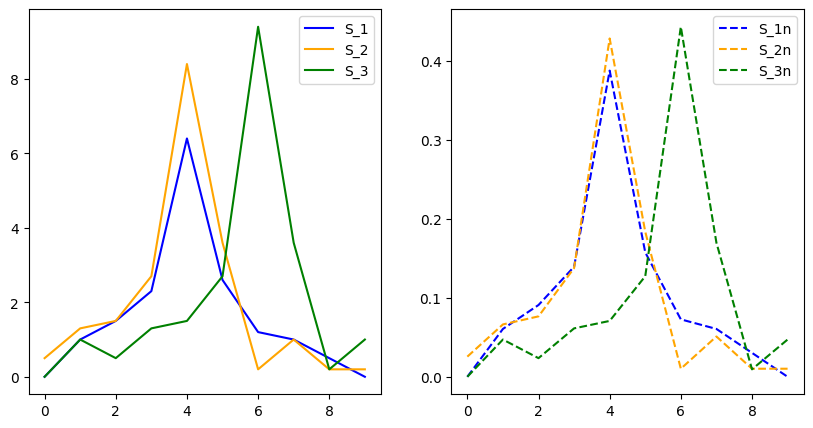

In [69]:
fig, ax = plt.subplots(1,2, figsize = [10,5])
ax[0].plot(S1, color = 'blue',  label = 'S_1')
ax[0].plot(S2, color = 'orange',label = 'S_2')
ax[0].plot(S3, color = 'green', label = 'S_3')
ax[0].legend()
ax[1].plot(S1n, color = 'blue',  linestyle = '--', label = 'S_1n')
ax[1].plot(S2n, color = 'orange',linestyle = '--', label = 'S_2n')
ax[1].plot(S3n, color = 'green', linestyle = '--', label = 'S_3n')
ax[1].legend()

# frequency modulation is impossible :)
# magnitude modulation is accountable :(


In [70]:
sum(S1n)  # yes it sums up to one

1.0

In [78]:
SS = sum(S1) +sum(S2) + sum(S3)
S1N = [i/SS for i in S1]
sum(S1N)
#unfortunately the common normalizer does not produce PDF because it does not sum to 1

0.2879581151832461

Text(0.5, 1.0, 'A wrong representation')

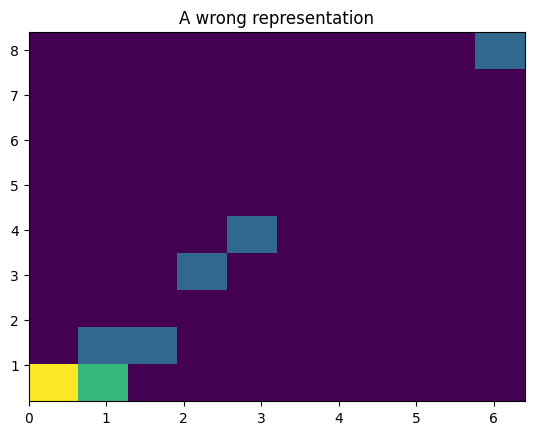

In [82]:
# produce samples from the joint probability density function
plt.hist2d(S1,S2)
plt.title('A wrong representation')
# This is a wrong representation, becuase we only have the marginal distributions
# and simply calling hist2d will driectly 'bin' the data in spectrum S, i.e., its magnitude values

In [ ]:
# Thus we need to produce a joint probability function.
# - Gibbs sampling is not helpful, since we dont have the conditional distributions. only the marginals
# -we could implement inverse transform sampling and then calculate the joint probability dist. really computation intensive way
# -- further problem is that each random sample would only approximate the jpf. thus bootstrapping would be necessary, further increasing computations.
# -- not to mention the question of independence.